In [1]:
import sys
import os
import Plotting as plot
sys.path.append(os.getcwd())
from quantileRegression import quantileRegression, setupJoblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
%matplotlib inline
#reload(plt)
plt.style.use('seaborn-talk')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,8)
import copy as cp



Welcome to ROOTaaS 6.06/08


In [2]:
# Variable you want to correct
ylist = ["R9", "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi",'CovarianceIetaIphi']
# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
n_jobs=30
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [3]:
# Upload Dataframes:
qr_mc1= quantileRegression("mc")
qr_mc2= quantileRegression("mc")
qr_data= quantileRegression("data")
qr_mc1.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Final.h5", 0, 2000000)
qr_mc2.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Final.h5", 0, 2000000)
qr_data.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_Final.h5", 0, 2000000)


Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Final.h5
Selecting events   [ 0 ,  2000000 ]  out of  9554789
number of events: 2000000
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Final.h5
Selecting events   [ 0 ,  2000000 ]  out of  9554789
number of events: 2000000
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_Final.h5
Selecting events   [ 0 ,  2000000 ]  out of  21216525
number of events: 2000000


In [4]:
qr_mc1.correctAll(X, ylist, quantiles,EBEE="EB", relativePath= "weights_Period_") 
qr_mc2.correctAll(X, ylist, quantiles,EBEE="EE", relativePath= "weights_Period_")
dfmc1= qr_mc1.getDF() 
dfmc2= qr_mc2.getDF() 
frame2 = [dfmc1, dfmc2] 
data2 = pd.concat(frame2) 
qr_mc= quantileRegression("mc")
qr_mc.df = data2.reset_index(drop=True) 

Loading corrected targets from :  correctedTargetsweights_Period_1_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_2_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_3_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_4_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_5_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_1_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_2_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_3_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_4_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_5_EE.h5


In [5]:
#%time qr_mc.correctPhoIso("../phoIsoStoch/corrections_hybrid.root",n_jobs=n_jobs)
qr_mc.df["PhoIso03_corr"]=qr_mc.df["PhoIso03"]

In [6]:
showerShapes = ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4',"CovarianceIphiIphi"]

mvas = [ ("moriondPhoID",dict(correct=[], rhoSubtraction=False) ), 
#("moriondPhoIDcorrShowerShapes",dict(correct=showerShapes, rhoSubtraction=True) ),
##("moriondPhoIDcorrIso",dict(correct=['PhoIso03'],rhoSubtraction=True)),
("moriondPhoIDcorrAll",dict(correct=showerShapes+['PhoIso03'], rhoSubtraction=False))]

weights = ("./phoIDMVAweights/HggPhoId_barrel_Moriond2017_wRhoRew.weights.xml","./phoIDMVAweights/HggPhoId_endcap_Moriond2017_wRhoRew.weights.xml")

In [7]:
%time qr_data.computeIdMvas( mvas[:1],  weights, n_jobs=n_jobs )
%time qr_mc.computeIdMvas( mvas, weights, n_jobs=n_jobs )
dfmc = qr_mc.getDF()
dfdata = qr_data.getDF()

Computing moriondPhoID, correcting {'rhoSubtraction': False, 'correct': []}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   53.2s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   54.1s remaining: 13.1min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   54.7s remaining:  6.2min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   56.7s remaining:  3.9min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:   57.9s remaining:  2.8min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:  1.0min remaining:  2.1min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:  1.0min remaining:  1.6min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:  1.0min remaining:  1.3min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:  1.1min remaining:  1.0min
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:  1.1min remaining:   47.4s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:  1.1min remaining:   36.9s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:  1.1min remaining:   27.6s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

CPU times: user 916 ms, sys: 829 ms, total: 1.74 s
Wall time: 1min 16s
Computing moriondPhoID, correcting {'rhoSubtraction': False, 'correct': []}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:  2.3min
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:  2.4min remaining: 34.4min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:  2.6min remaining: 17.6min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:  2.8min remaining: 11.5min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:  2.9min remaining:  8.3min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:  3.1min remaining:  6.6min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:  3.5min remaining:  5.5min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:  3.7min remaining:  4.5min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:  4.2min remaining:  3.9min
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:  4.3min remaining:  3.1min
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:  4.4min remaining:  2.4min
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:  5.4min remaining:  2.2min
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

Computing moriondPhoIDcorrAll, correcting {'rhoSubtraction': False, 'correct': ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4', 'CovarianceIphiIphi', 'PhoIso03']}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:  3.1min
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:  3.1min remaining: 45.6min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:  3.3min remaining: 22.1min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:  3.6min remaining: 15.0min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:  3.8min remaining: 10.8min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:  3.8min remaining:  8.0min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:  4.1min remaining:  6.4min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:  4.3min remaining:  5.3min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:  4.4min remaining:  4.1min
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:  4.6min remaining:  3.3min
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:  4.8min remaining:  2.6min
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:  5.3min remaining:  2.2min
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

CPU times: user 11.1 s, sys: 7.74 s, total: 18.8 s
Wall time: 12min 14s
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside


In [8]:
dfEB   = dfdata  .query('(-1.444 < ScEta and ScEta <1.444) and (mass > 70 and mass < 110)  and (ChIso03 < 5)') 
dfEE   = dfdata  .query('(ScEta < -1.57 or ScEta >1.57)  and (mass > 70 and mass < 110)  and (ChIso03 < 5) and (R9>0.8)')
dfmcEB   = dfmc  .query('(-1.444 < ScEta and ScEta <1.444)  and (mass > 70 and mass < 110) and (ChIso03 < 5)') 
dfmcEE   = dfmc  .query('(ScEta < -1.57 or ScEta >1.57) and (mass > 70 and mass < 110)  and (ChIso03 < 5) and (R9>0.8)')

Plotting.py:52: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if axes == None: axes = fig.axes


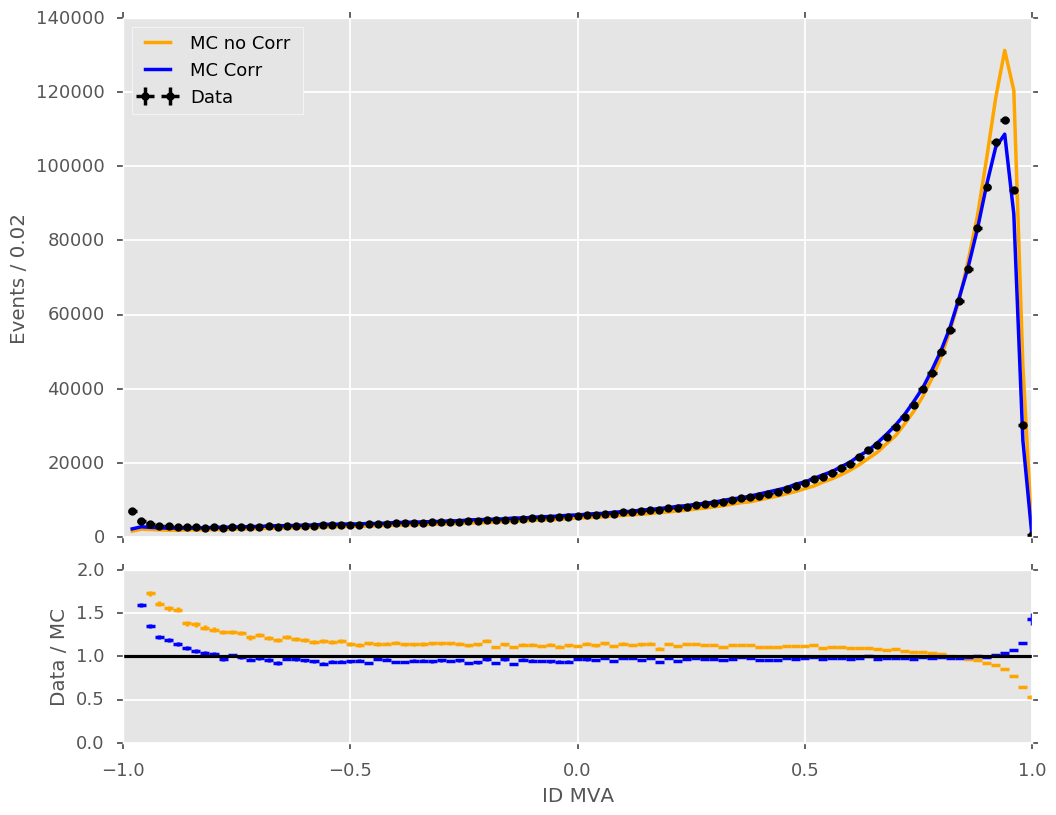

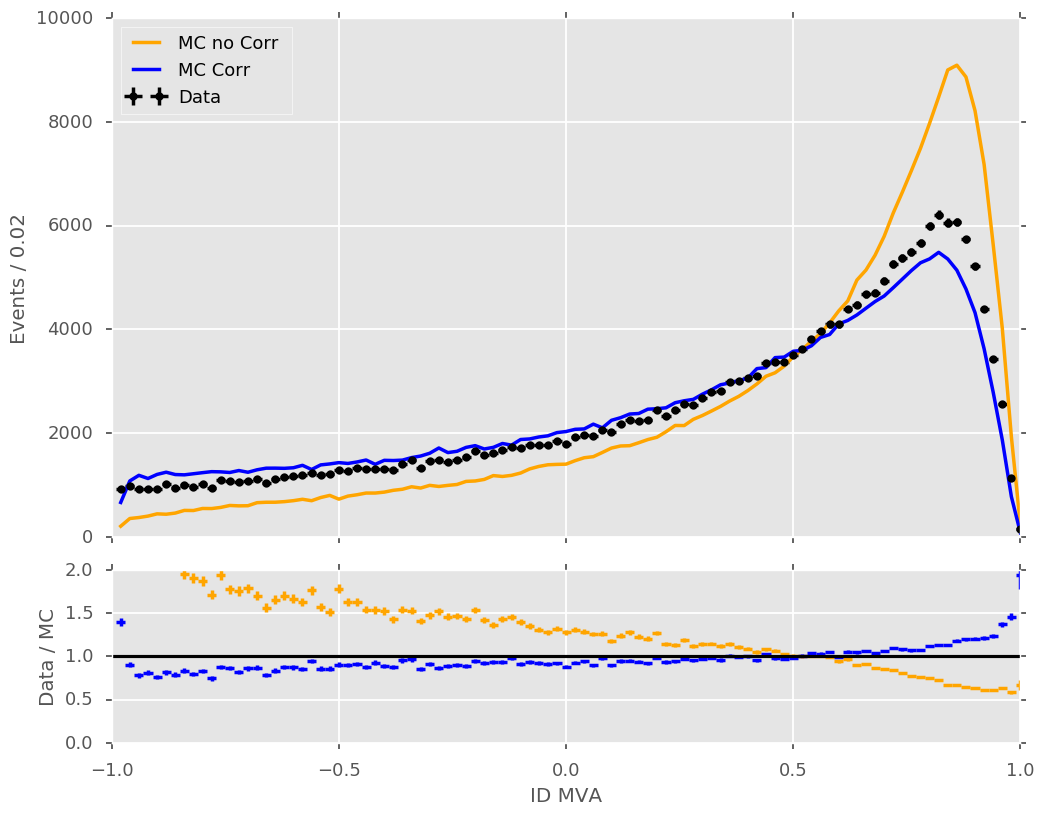

In [9]:
bins = np.linspace(-1,1,101)
var = 'moriondPhoID'
mclabels = [ '', 'corrAll']
mcstyles = [ dict(label='MC no Corr ',color='orange'),
             dict(label='MC Corr ',color='blue'), 
           ]

for dfs in [ (dfEB,dfmcEB), (dfEE,dfmcEE) ]: 
    data, mc = plot.data_mc(dfs[0],dfs[1],var,bins,weight="weight",mclabels=mclabels)
    plot.draw_data_mc(bins, data, zip(mc,mcstyles), var='ID MVA', markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8))
  

In [10]:
import matplotlib as mpl
from functools import reduce
mpl.rcParams['figure.figsize'] = (8,8)

mpl.rc('xtick', labelsize=40) 
mpl.rc('ytick', labelsize=20) 
mpl.rc('lines', linewidth=2)
mpl.rc('axes', linewidth=2)

def set_style(obj,color):
    obj.set_color(color)
    obj.set_linewidth(2)
    
def do_boxplot(df,column,by,color,ax):
    objs = df.query('%s > -0.8' % column).boxplot(column=column,by=by, return_type='dict', ax=ax)
    map(lambda x: set_style(x,color), reduce(lambda x,y: x+y, objs[column].values()))

def do_var_boxplot(df,cut,column,by,color,ax):
    objs = df.query(cut).boxplot(column=column,by=by, return_type='dict', ax=ax)
    map(lambda x: set_style(x,color), reduce(lambda x,y: x+y, objs[column].values()))

In [15]:
binsEta = np.linspace(-2.5,2.5, 21)

dfmc['etaBin'] = pd.cut(dfmc.ScEta,binsEta)
dfdata['etaBin'] = pd.cut(dfdata.ScEta,binsEta)

binsPt = np.linspace(20,80,21)

dfmc['ptBin'] = pd.cut(dfmc.Pt,binsPt)
dfdata['ptBin'] = pd.cut(dfdata.Pt,binsPt)

dfmcEB['ptBin'] = pd.cut(dfmcEB.Pt,binsPt)
dfEB['ptBin'] = pd.cut(dfEB.Pt,binsPt)

dfmcEE['ptBin'] = pd.cut(dfmcEE.Pt,binsPt)
dfEE['ptBin'] = pd.cut(dfEE.Pt,binsPt)

binsRho = np.linspace(0,25,26)

dfmc['rhoBin'] = pd.cut(dfmc.rho,binsRho)
dfdata['rhoBin'] = pd.cut(dfdata.rho,binsRho)

dfmcEB['rhoBin'] = pd.cut(dfmcEB.rho,binsRho)
dfEB['rhoBin'] = pd.cut(dfEB.rho,binsRho)

dfmcEE['rhoBin'] = pd.cut(dfmcEE.rho,binsRho)
dfEE['rhoBin'] = pd.cut(dfEE.rho,binsRho)



/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

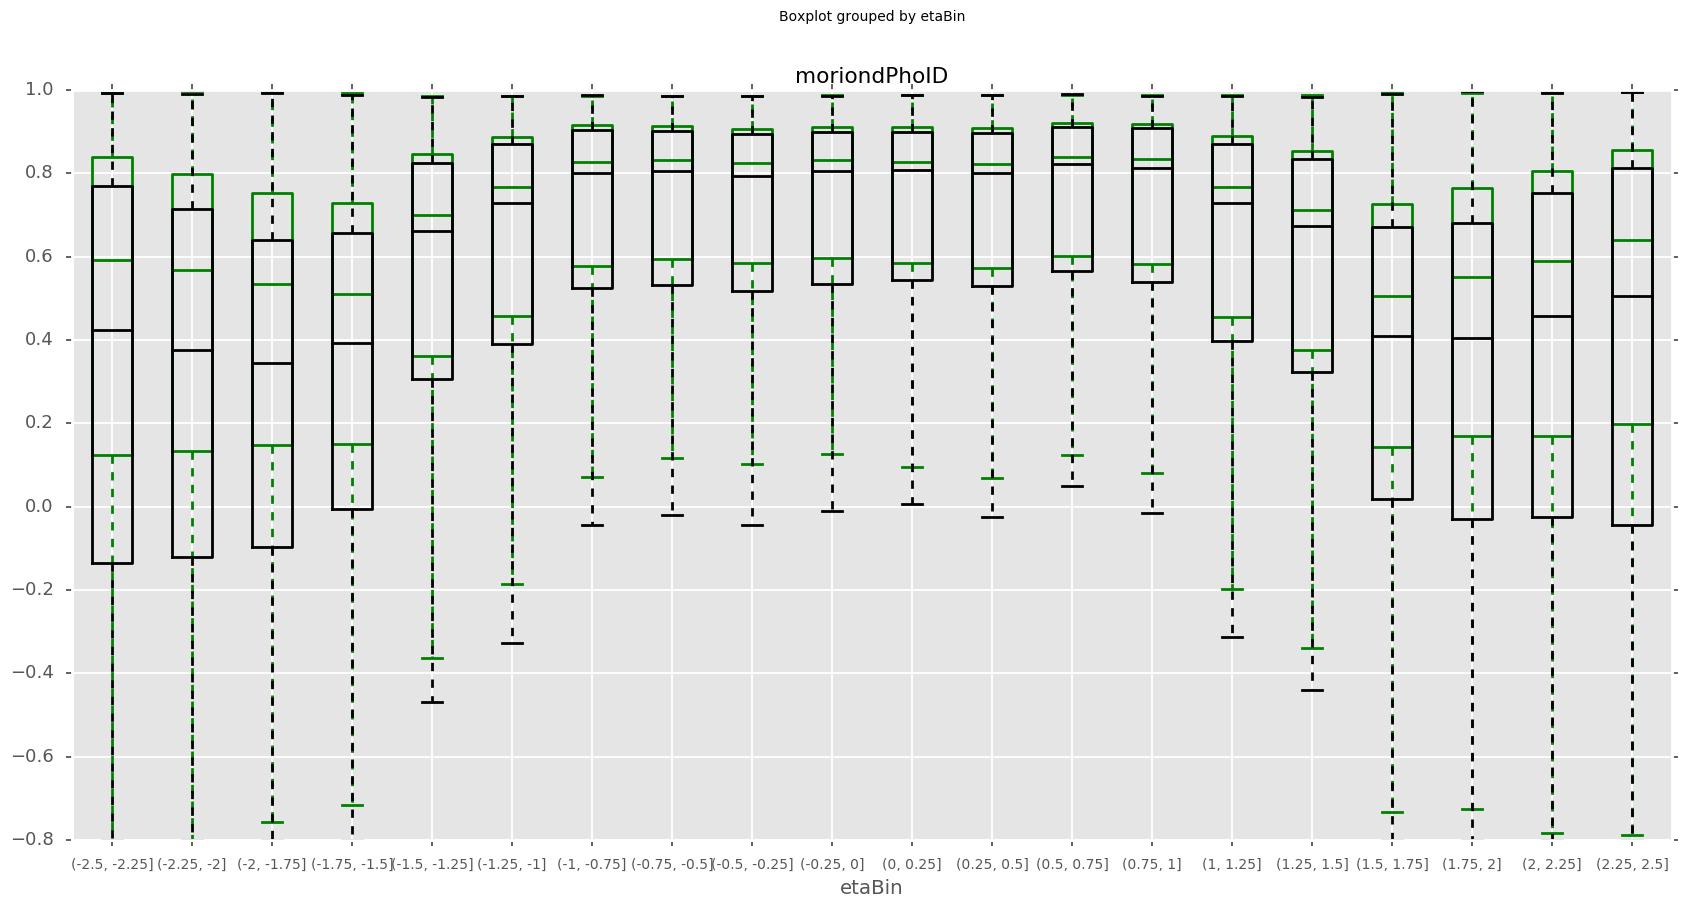

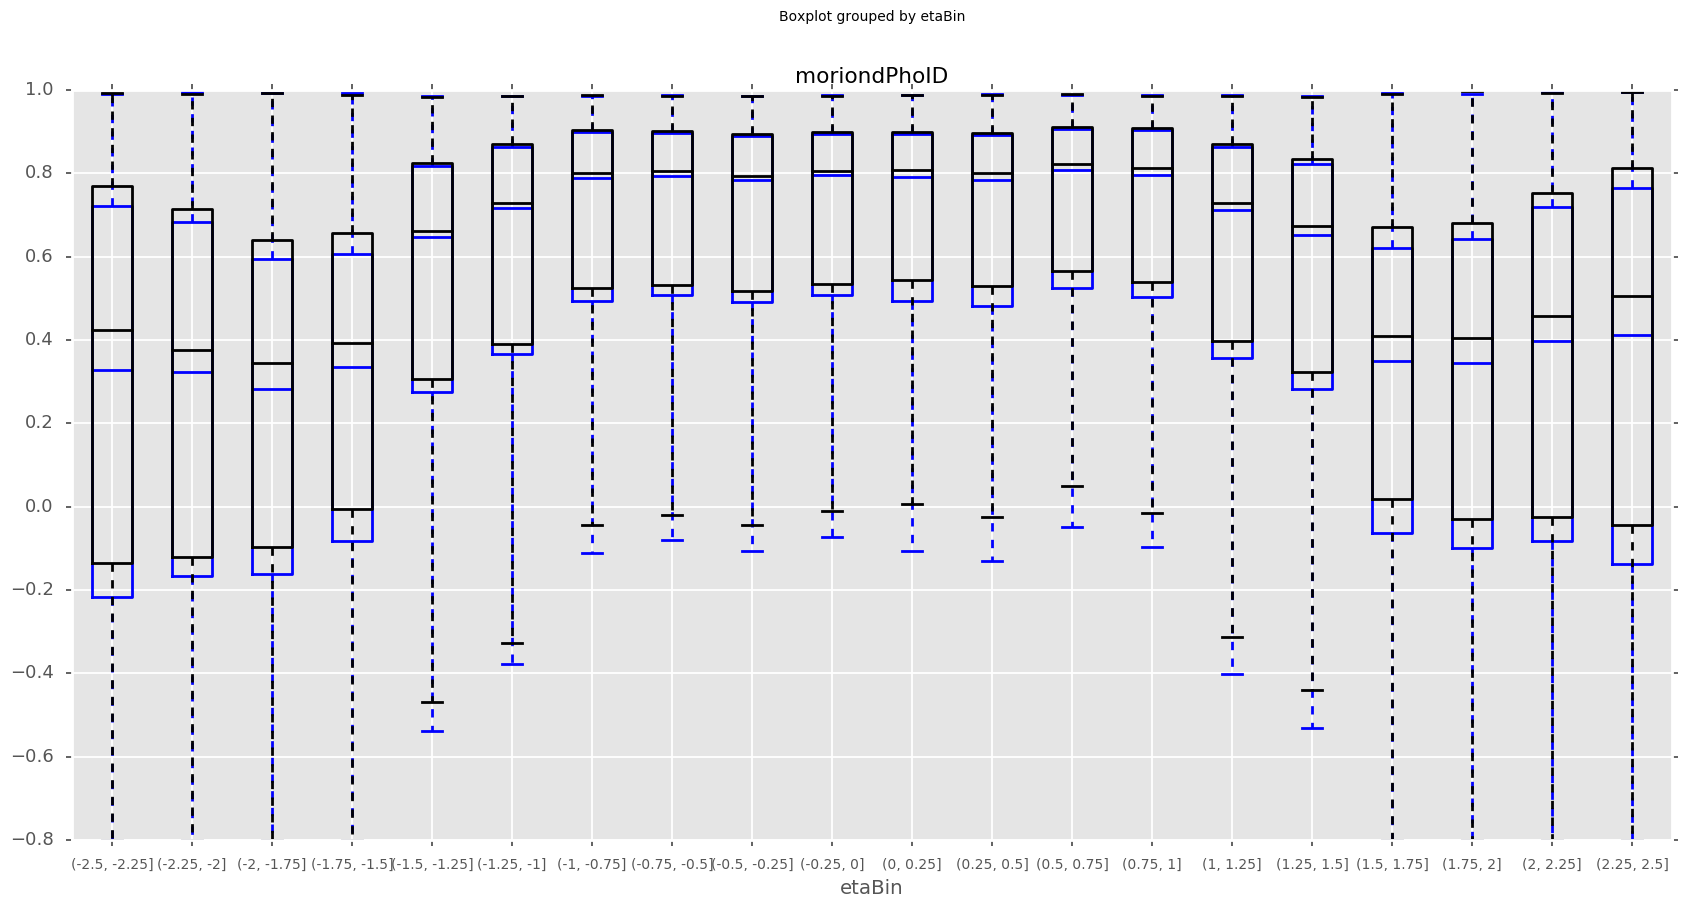

In [16]:
%matplotlib inline
plt.style.use('seaborn-talk')

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmc,'moriondPhoID', 'etaBin', 'green', ax)
do_boxplot(dfdata,'moriondPhoID', 'etaBin', 'black', ax)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmc,'moriondPhoIDcorrAll', 'etaBin', 'blue', ax)
do_boxplot(dfdata,'moriondPhoID', 'etaBin', 'black', ax)

fig.show()

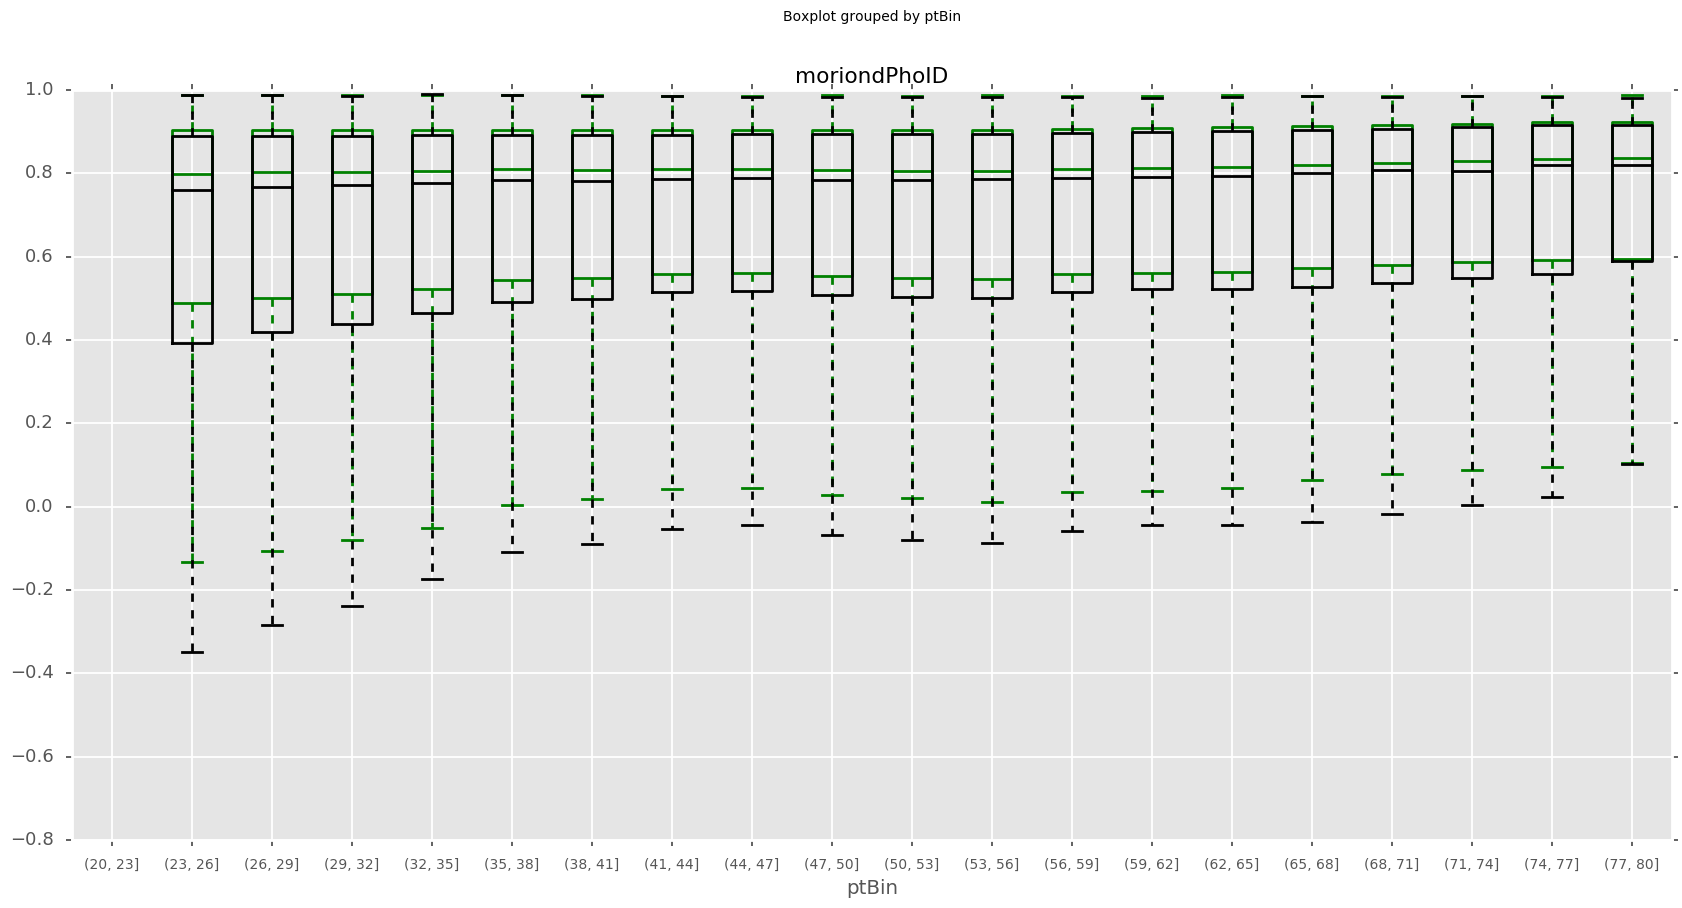

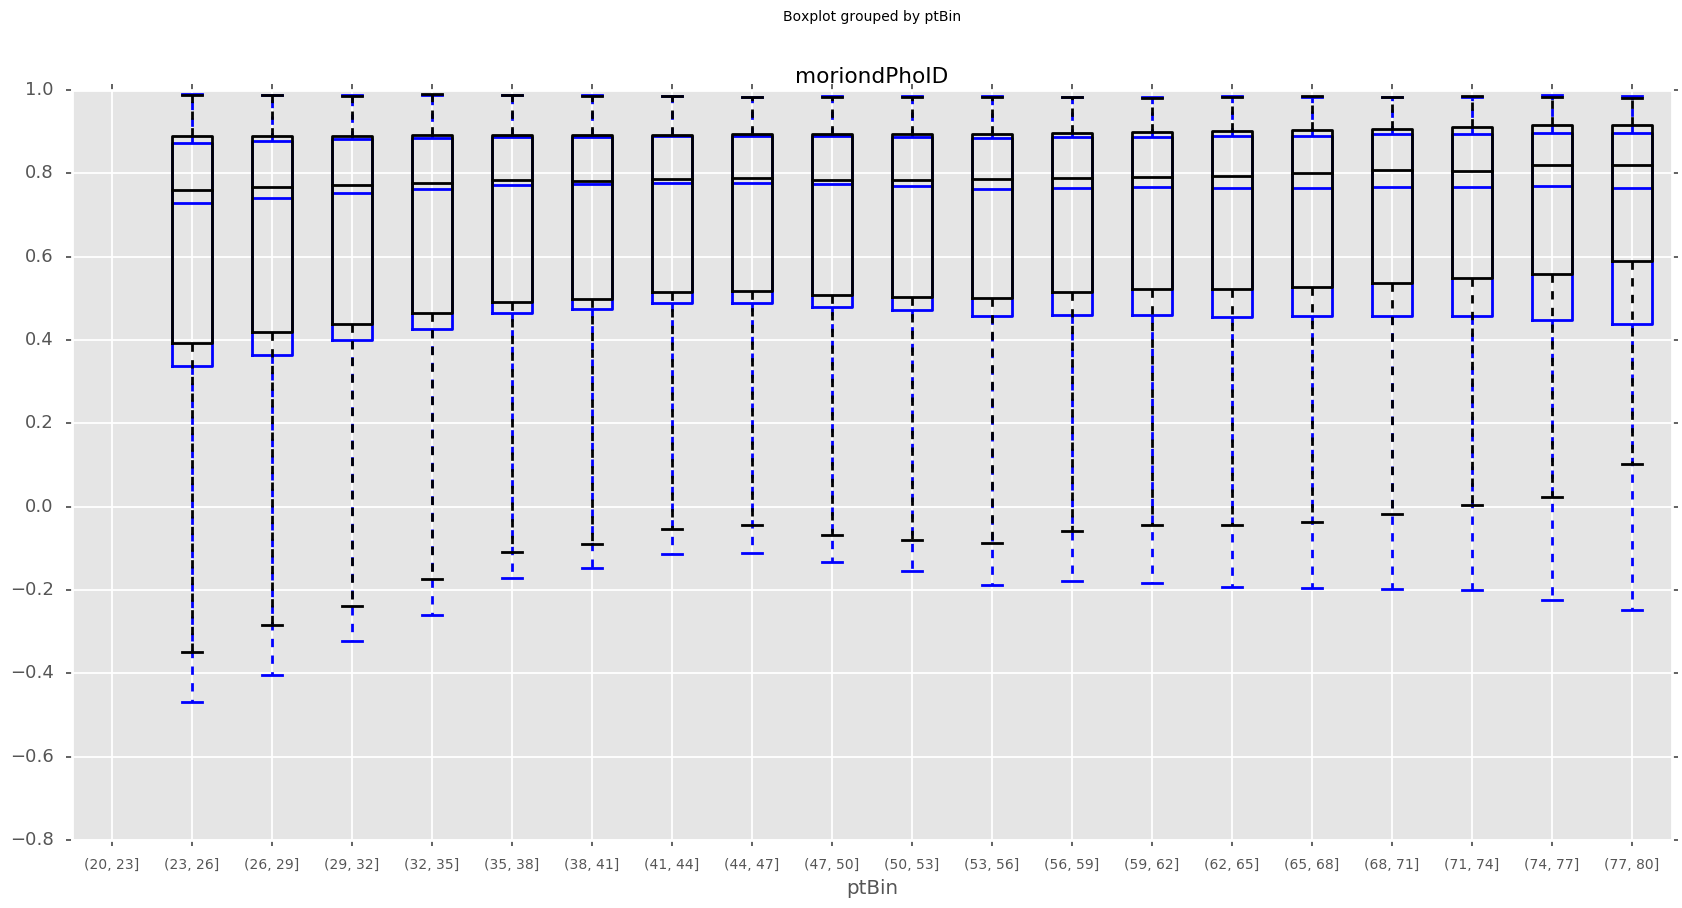

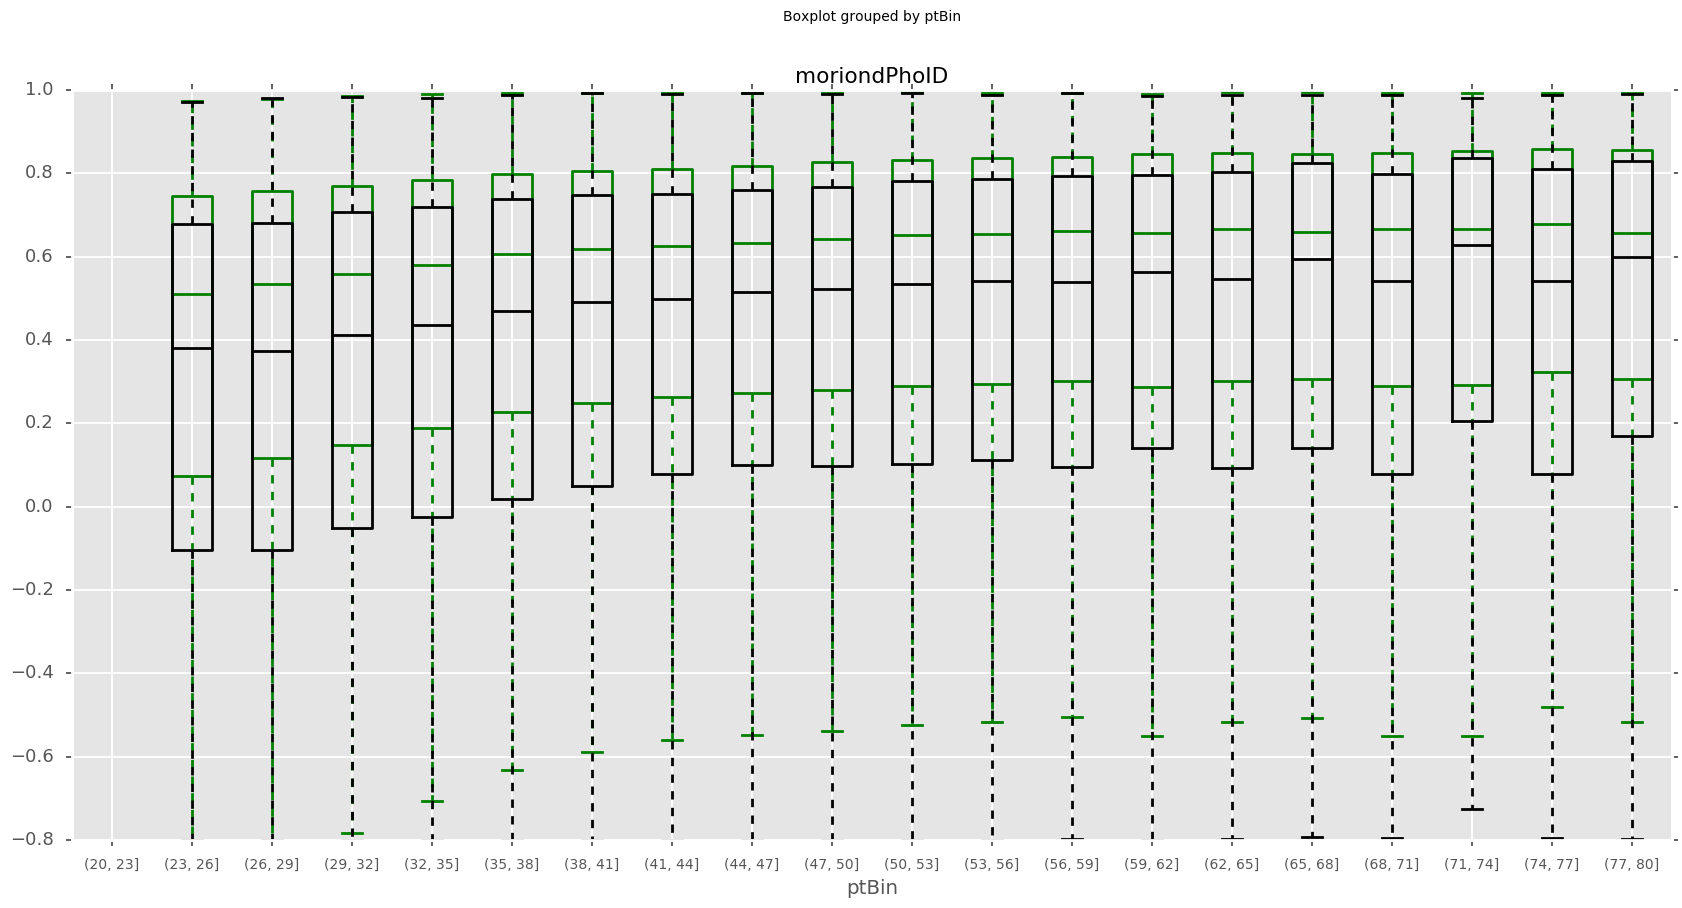

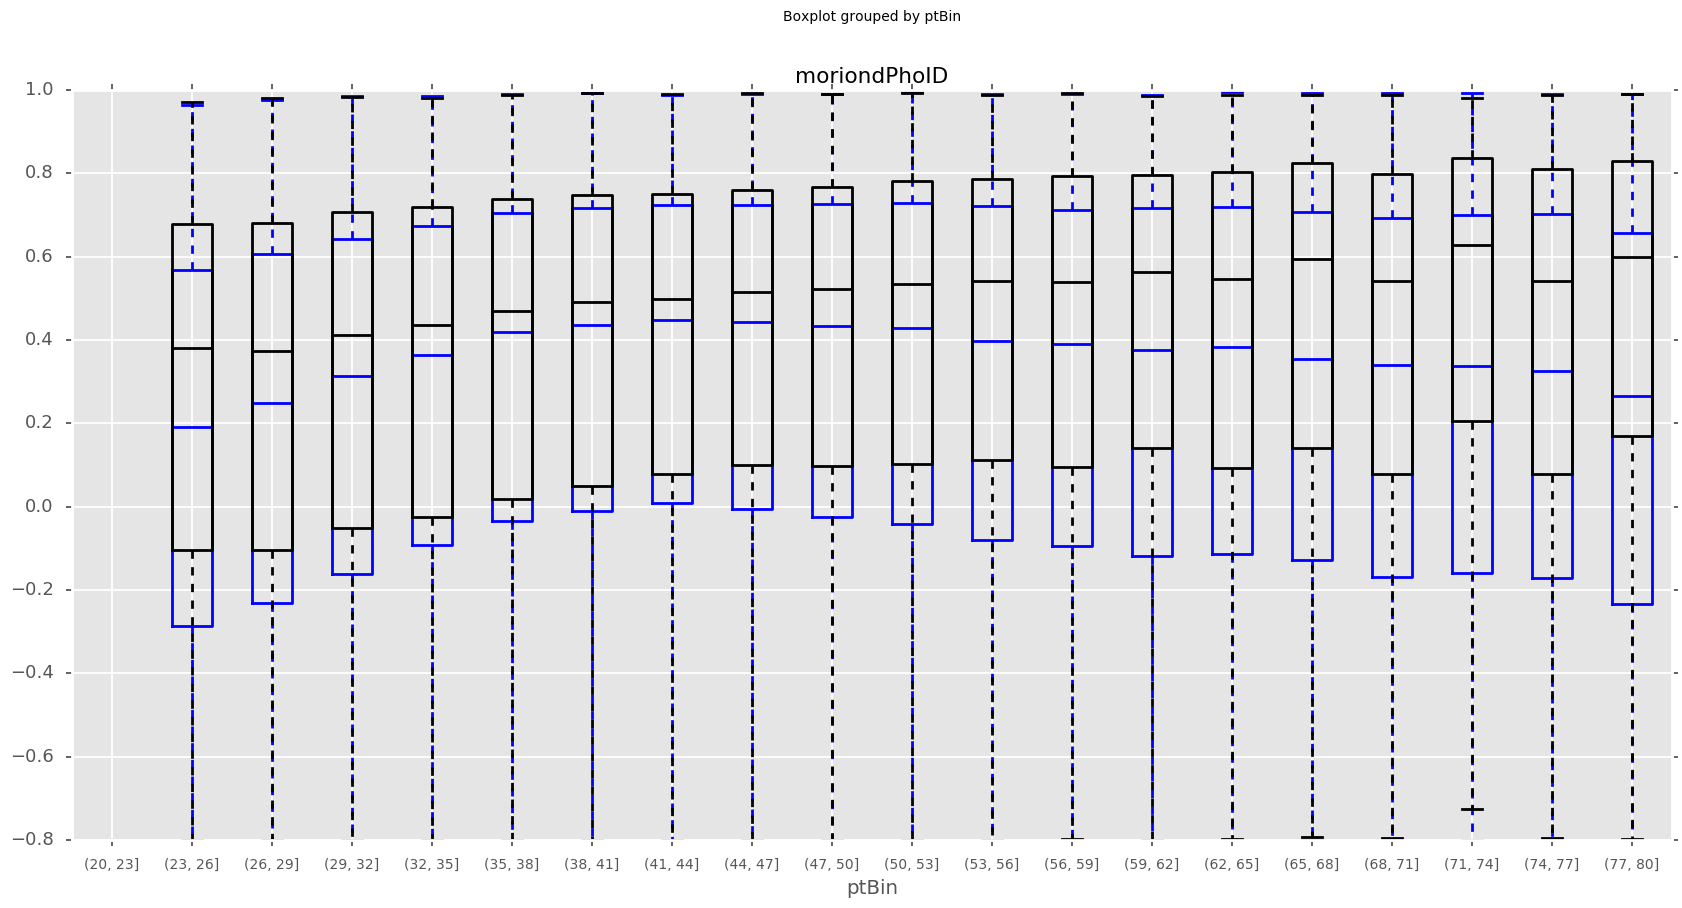

In [17]:


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmcEB,'moriondPhoID', 'ptBin', 'green', ax)
do_boxplot(dfEB,'moriondPhoID', 'ptBin', 'black', ax)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmcEB,'moriondPhoIDcorrAll', 'ptBin', 'blue', ax)
do_boxplot(dfEB,'moriondPhoID', 'ptBin', 'black', ax)


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmcEE,'moriondPhoID', 'ptBin', 'green', ax)
do_boxplot(dfEE,'moriondPhoID', 'ptBin', 'black', ax)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmcEE,'moriondPhoIDcorrAll', 'ptBin', 'blue', ax)
do_boxplot(dfEE,'moriondPhoID', 'ptBin', 'black', ax)

# dfmc.boxplot(column='moriondPhoIDcorr',by='etaBin', return_type='dict', ax=ax, color='blue')

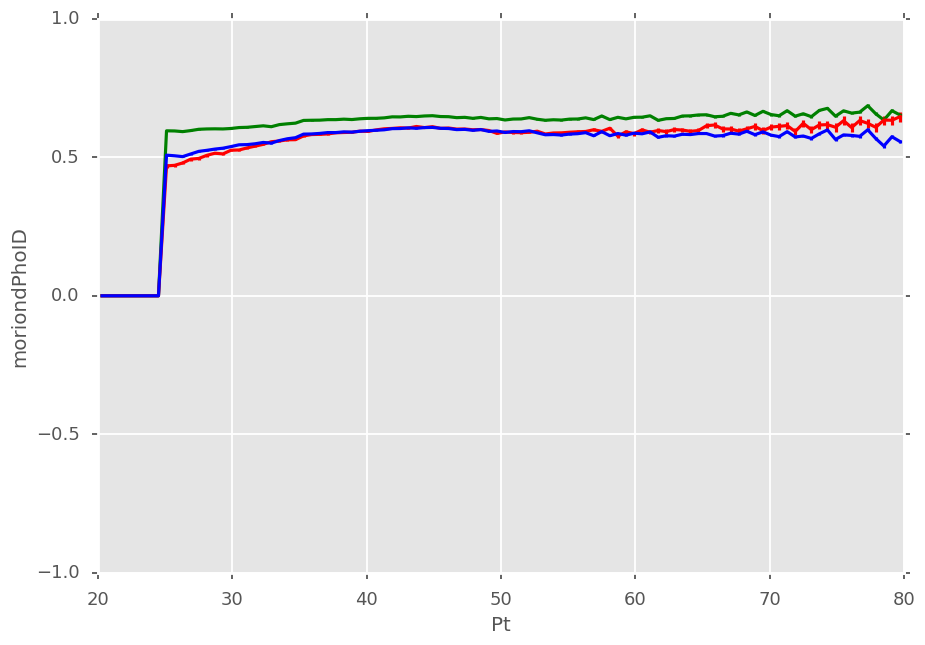

In [23]:
dfm=dfmcEB
dfd=dfEB
xvar="Pt"
yvar="moriondPhoID"
xmin,xmax=20.0,80.0
minY=-1
maxY=1
fig = plt.figure(dpi=400)
ax = fig.add_subplot(111)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
ax.set_xlabel(xvar)
ax.set_ylabel(yvar)
ax.set_xlim(xmin,xmax)
ax.set_ylim(minY,maxY)
plot.Profile(dfm[xvar]  , dfm[yvar]        ,100,xmin,xmax,minY,maxY,ax,'green',dfm["weight"])
plot.Profile(dfd[xvar]  , dfd[yvar]        ,100,xmin,xmax,minY,maxY,ax,'red',dfd["weight"])
plot.Profile(dfm[xvar]  , dfm[yvar+'corrAll']        ,100,xmin,xmax,minY,maxY,ax,'blue',dfm["weight"])

        

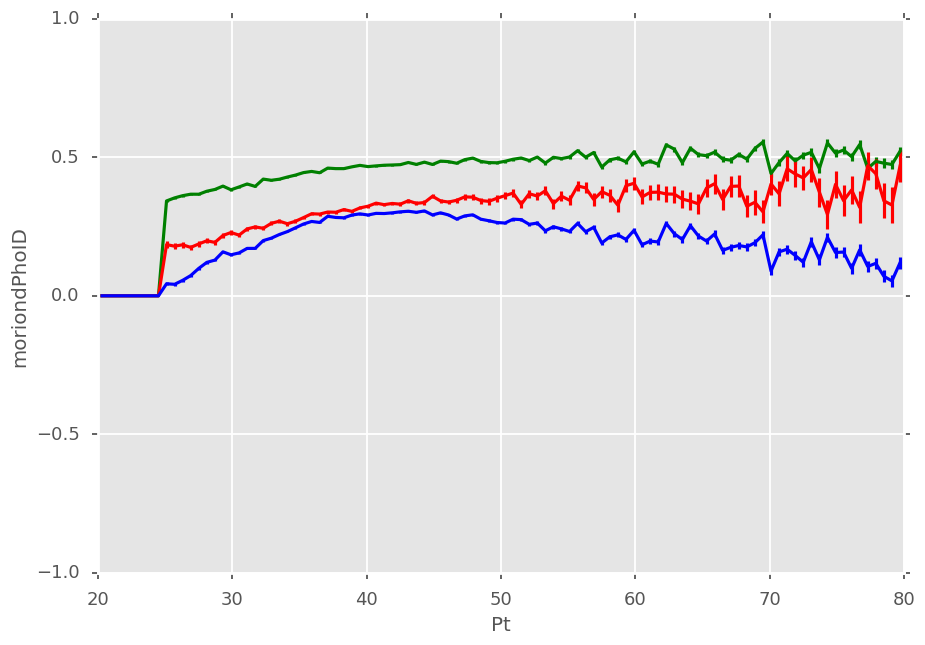

In [24]:
dfm=dfmcEE
dfd=dfEE
xvar="Pt"
yvar="moriondPhoID"
xmin,xmax=20.0,80.0
minY=-1
maxY=1
fig = plt.figure(dpi=400)
ax = fig.add_subplot(111)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
ax.set_xlabel(xvar)
ax.set_ylabel(yvar)
ax.set_xlim(xmin,xmax)
ax.set_ylim(minY,maxY)
plot.Profile(dfm[xvar]  , dfm[yvar]        ,100,xmin,xmax,minY,maxY,ax,'green',dfm["weight"])
plot.Profile(dfd[xvar]  , dfd[yvar]        ,100,xmin,xmax,minY,maxY,ax,'red',dfd["weight"])
plot.Profile(dfm[xvar]  , dfm[yvar+'corrAll']        ,100,xmin,xmax,minY,maxY,ax,'blue',dfm["weight"])

        